In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# CIFAR-10 데이터셋 불러오기 및 전처리
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 데이터 정규화

# 레이블을 one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구성
model = models.Sequential()

# 첫 번째 합성곱 층
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 두 번째 합성곱 층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 완전 연결 층을 위해 Flatten 층 추가
model.add(layers.Flatten())

# Dense 층 추가
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 요약 출력
model.summary()

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# 테스트 데이터로 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n테스트 정확도: {test_acc}")

170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

In [2]:
# Inception 모듈 정의
def inception_module(x, filters):
    f1, f2_in, f2_out, f3_in, f3_out, f4 = filters

    conv1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)

    conv3 = layers.Conv2D(f2_in, (1, 1), padding='same', activation='relu')(x)
    conv3 = layers.Conv2D(f2_out, (3, 3), padding='same', activation='relu')(conv3)

    conv5 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    conv5 = layers.Conv2D(f3_out, (5, 5), padding='same', activation='relu')(conv5)

    pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool = layers.Conv2D(f4, (1, 1), padding='same', activation='relu')(pool)

    output = layers.concatenate([conv1, conv3, conv5, pool], axis=-1)

    return output

# 새로운 모델 구성
inputs = layers.Input(shape=(32, 32, 3))

# 첫 번째 합성곱 층
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)

# 첫 번째 Inception 모듈
x = inception_module(x, [64, 96, 128, 16, 32, 32])

# 두 번째 합성곱 층
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# 두 번째 Inception 모듈
x = inception_module(x, [128, 128, 192, 32, 96, 64])

# 세 번째 합성곱 층
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

# 완전 연결 층을 위해 Flatten 층 추가
x = layers.Flatten()(x)

# Dense 층 추가
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# 새로운 모델 정의
inception_model = models.Model(inputs, outputs)

# 새로운 모델 요약 출력
inception_model.summary()

# 새로운 모델 컴파일
inception_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# 새로운 모델 학습
history_inception = inception_model.fit(x_train, y_train, epochs=10,
                                        validation_data=(x_test, y_test))

# 테스트 데이터로 새로운 모델 평가
test_loss_inception, test_acc_inception = inception_model.evaluate(x_test, y_test, verbose=2)
print(f"\nInception 모듈을 사용한 모델의 테스트 정확도: {test_acc_inception}")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 30, 30, 32)           896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 15, 15, 96)           3168      ['max_pooling2d_2[0][0]'] 

313/313 [==============================] - 41s 131ms/step


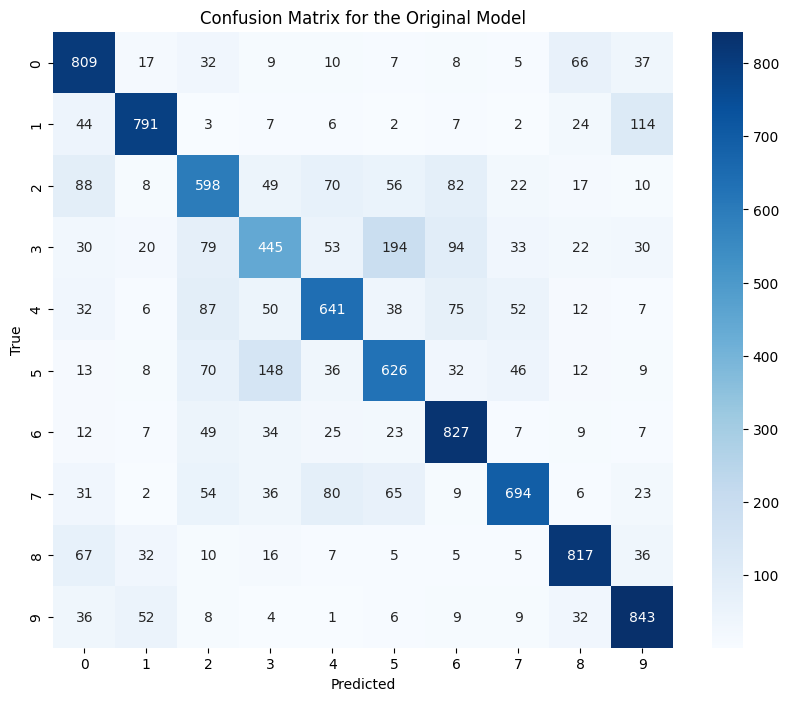

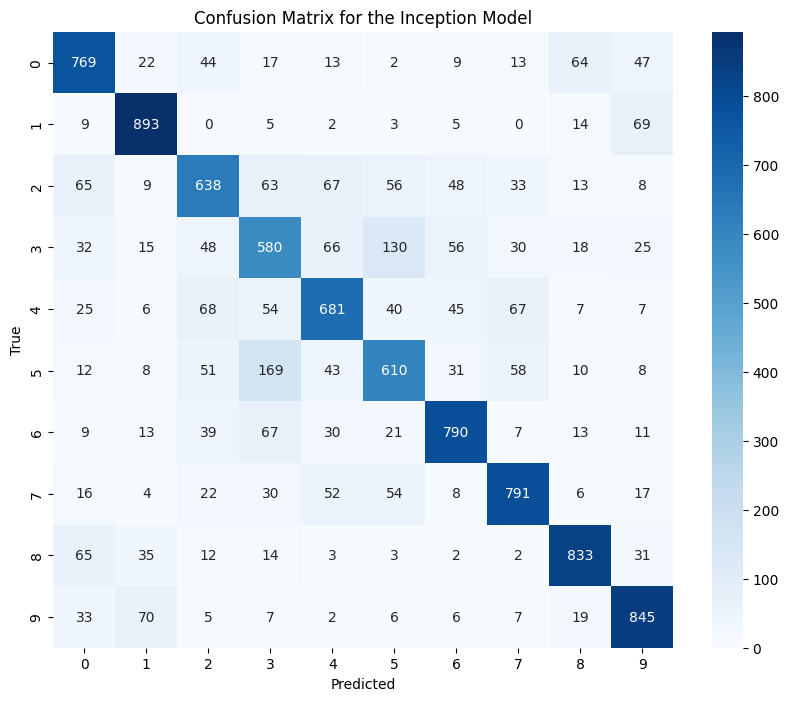

Classification Report for the Original Model:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1000
           1       0.84      0.79      0.81      1000
           2       0.60      0.60      0.60      1000
           3       0.56      0.45      0.49      1000
           4       0.69      0.64      0.66      1000
           5       0.61      0.63      0.62      1000
           6       0.72      0.83      0.77      1000
           7       0.79      0.69      0.74      1000
           8       0.80      0.82      0.81      1000
           9       0.76      0.84      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Classification Report for the Inception Model:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1000
           1       0.83      0.89      

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 기존 모델의 예측
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Inception 모듈을 사용한 모델의 예측
y_pred_inception = inception_model.predict(x_test)
y_pred_inception_classes = np.argmax(y_pred_inception, axis=1)

# Confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix_inception = confusion_matrix(y_true, y_pred_inception_classes)

# Confusion matrix 시각화 함수
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 기존 모델의 confusion matrix 시각화
plot_confusion_matrix(conf_matrix, "Confusion Matrix for the Original Model")

# Inception 모듈을 사용한 모델의 confusion matrix 시각화
plot_confusion_matrix(conf_matrix_inception, "Confusion Matrix for the Inception Model")

# Classification report 출력
print("Classification Report for the Original Model:")
print(classification_report(y_true, y_pred_classes))

print("Classification Report for the Inception Model:")
print(classification_report(y_true, y_pred_inception_classes))


313/313 [==============================] - 39s 121ms/step


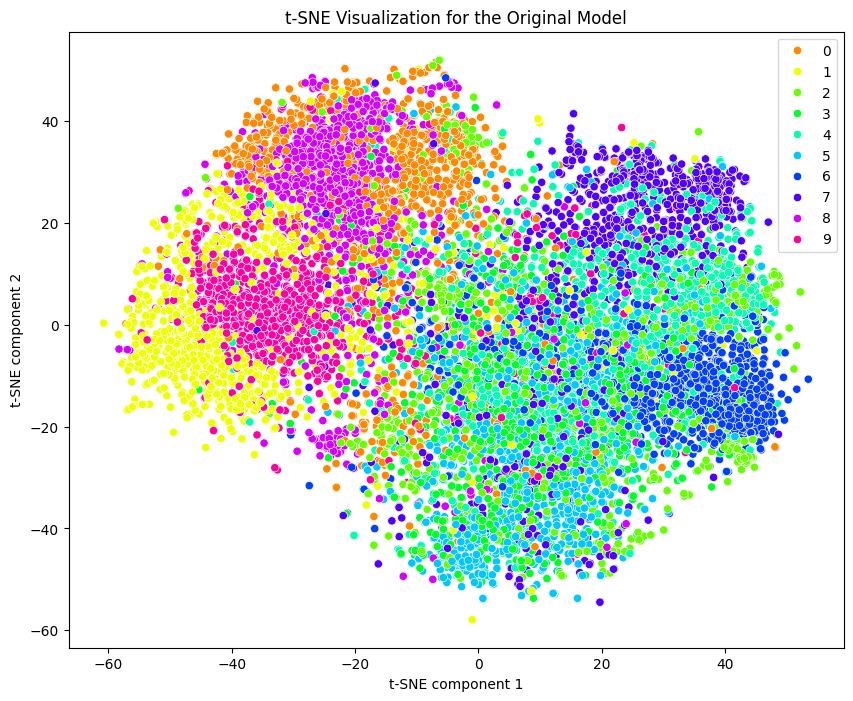

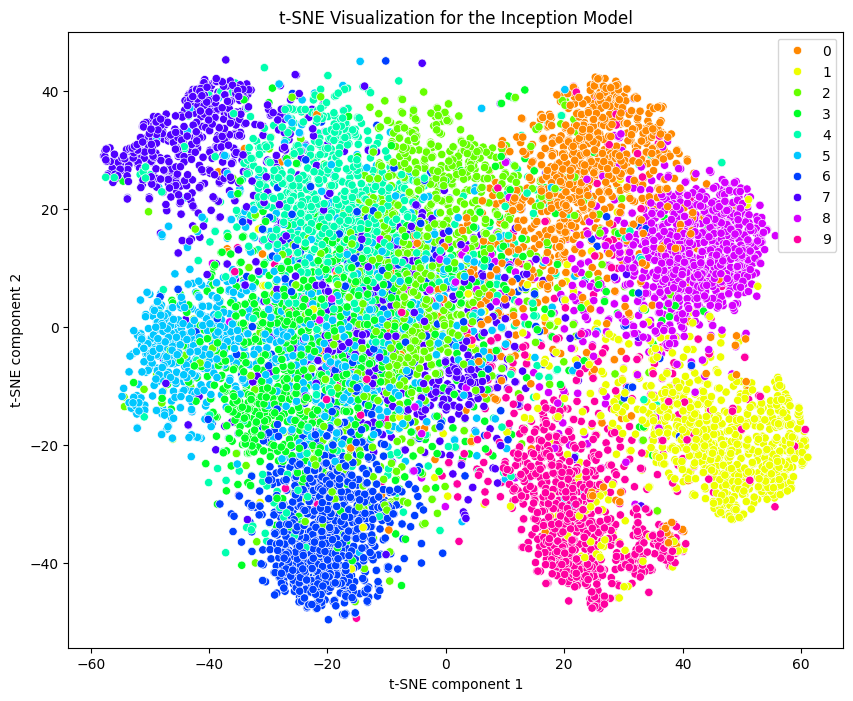

In [5]:
from sklearn.manifold import TSNE

# 기존 모델의 Flatten 층 출력을 얻기 위해 새 모델 정의
flatten_model = models.Model(inputs=model.input, outputs=model.get_layer(index=-3).output)
flatten_output = flatten_model.predict(x_test)

# Inception 모듈을 사용한 모델의 Flatten 층 출력을 얻기 위해 새 모델 정의
flatten_model_inception = models.Model(inputs=inception_model.input, outputs=inception_model.get_layer(index=-3).output)
flatten_output_inception = flatten_model_inception.predict(x_test)

# t-SNE로 차원 축소
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(flatten_output)
tsne_result_inception = tsne.fit_transform(flatten_output_inception)

# t-SNE 결과 시각화 함수
def plot_tsne(tsne_result, y_true, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=y_true, palette=sns.color_palette("hsv", 10), legend='full')
    plt.title(title)
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')
    plt.show()

# 기존 모델의 t-SNE 결과 시각화
plot_tsne(tsne_result, y_true, "t-SNE Visualization for the Original Model")

# Inception 모듈을 사용한 모델의 t-SNE 결과 시각화
plot_tsne(tsne_result_inception, y_true, "t-SNE Visualization for the Inception Model")
